In [1]:
import scanpy as sc
import pandas as pd
import seaborn as sns
import scanpy.external as sce
import os

import numpy as np

In [7]:
color_CLASS = [
                 '#0000FF', # 0
                 '#FF0000', # 1   
                 '#FF8C00', # 2
                 '#FFD700', # 3  
                 '#808000', # 4
                 '#9ACD32', # 5   
                 '#44F544', # 6
                 '#20B2AA', # 7  
                 '#2F4F4F', # 8
                 '#00BFFF', # 9   
                 '#147ADF', # 10
                 '#191970', # 11 
                 '#6200A4', # 12
                 '#8B008B', # 13  
                 '#FF00FF', # 14
                 '#FF1493', # 15 
                 '#8B4513', # 16
                 '#D2691E', # 17 
                 '#B0C4DE', # 18
                 '#696969', # 19
                 '#FF586E', # 20
                 '#FAEBD7', # 21
                 '#E2C792', # 22
                 '#FFF7A4', # 23
                 '#83715A', # 24
                 '#BC8F8F', # 25
                 '#4C718E', # 26
                 '#519395', # 27
                 '#7FFFD4', # 28  
                 '#0F830F', # 29
                 '#D4FFF0', # 30
                 '#B72222', # 31
                 '#FDBABA', # 32
                 '#1B1010', # 33
                 '#CD57FF', # 34
                 '#F0FFFF', # 35
        
]

In [18]:
# SPECIFY OUTPUT STEMS FOR FIGURES/PATHWAY ANALYSIS
#FIG_output_stem = "./output_step2.5.3.filter_junk_scanpy_pipeline/" + now +'/'
FIG_output_stem = "./output2_step2.5.3.filter_junk_scanpy_pipeline/data_Epithelial/malignant/" + 'figure' +'/'
DATA_output_stem = "./output2_step2.5.3.filter_junk_scanpy_pipeline/data_Epithelial/malignant/" + 'data' +'/'

print(FIG_output_stem)
print(DATA_output_stem)

# CREATE FIGURE DIRECTORY IF IT DOES NOT EXIST     
d = os.path.dirname(FIG_output_stem)
if not os.path.exists(d):
        os.makedirs(d)

d = os.path.dirname(DATA_output_stem)
if not os.path.exists(d):
        os.makedirs(d)
    
sc.settings.figdir=FIG_output_stem   

./output2_step2.5.3.filter_junk_scanpy_pipeline/data_Epithelial/malignant/figure/
./output2_step2.5.3.filter_junk_scanpy_pipeline/data_Epithelial/malignant/data/


In [4]:
####load data
adata=sc.read('output2_step2.5.3.filter_junk_scanpy_pipeline/data_Epithelial/malignant/sceMalignant_cells.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 12249 × 20532
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'Index', 'Sample', 'percent_mt', 'percent_rb', 'Cell_type', 'Cell_type_refined', 'Cell_subtype', 'age', 'Sex', 'Smoking', 'Stages', 'percent_mt_merge', 'percent_rb_merge', 'S_Score', 'G2M_Score', 'Phase', 'old_ident', 'CC_Difference', 'Cell_subtype_unimodel', 'Cell_type_unimodel', 'UMAP_Clusters_harmony_overclustered', 'scrubletScore_default', 'scrublet_predict_default', 'scrubletScore_n30', 'scrublet_predict_n30'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'

In [6]:
#prepeocess the data
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata.raw = adata
adata.layers["counts"] = adata.X.copy()
adata= adata[:, adata.var.highly_variable]
sc.pp.regress_out(adata, ['nCount_RNA', 'percent_mt_merge','CC_Difference'])
sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

/home/chenh/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/chenh/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
/home/chenh/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):


In [75]:
##do batch effect using harmony
#sc.external.pp.bbknn(adata, batch_key='Sample')
#sce.pp.harmony_integrate(adata, 'Sample')
#sc.pp.neighbors(adata, n_neighbors=5, n_pcs=40,use_rep='X_pca_harmony')
sc.pp.neighbors(adata, n_neighbors=30, n_pcs=50)

sc.tl.umap(adata)

In [76]:
sc.settings.set_figure_params(dpi=80, frameon=True, figsize=(3, 4), facecolor='white')

/home/chenh/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


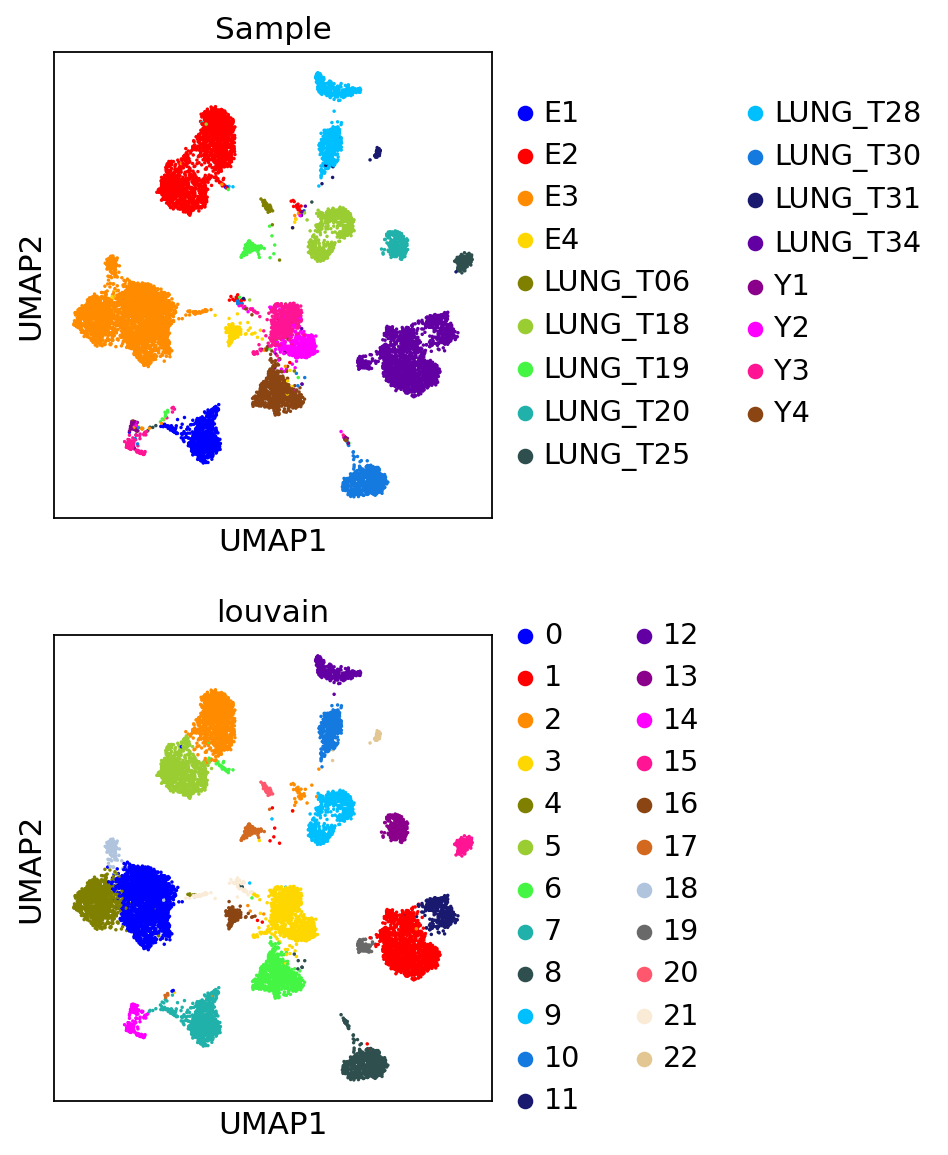

In [77]:
sc.tl.louvain(adata,resolution=1)
sc.pl.umap(adata, color=['Sample','louvain'],palette=color_CLASS,ncols=1,save='_malignantcells.pdf')

In [78]:
#
save_file = DATA_output_stem + '/adata_malignantcell.h5ad'
adata.write_h5ad(save_file)

/home/chenh/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


In [44]:
adata=sc.read(DATA_output_stem + '/adata_malignantcell.h5ad')
adata.obs.to_csv(DATA_output_stem + '/adata_malignantcell.csv')

In [45]:
adata

AnnData object with n_obs × n_vars = 12249 × 1547
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'Index', 'Sample', 'percent_mt', 'percent_rb', 'Cell_type', 'Cell_type_refined', 'Cell_subtype', 'age', 'Sex', 'Smoking', 'Stages', 'percent_mt_merge', 'percent_rb_merge', 'S_Score', 'G2M_Score', 'Phase', 'old_ident', 'CC_Difference', 'Cell_subtype_unimodel', 'Cell_type_unimodel', 'UMAP_Clusters_harmony_overclustered', 'scrubletScore_default', 'scrublet_predict_default', 'scrubletScore_n30', 'scrublet_predict_n30', 'louvain'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Sample_colors', 'hvg', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [46]:
#define age group
cut_labels_3 = ['Young', 'Intermediated', 'Aged']
cut_bins = [20, 49, 60,100]
adata.obs['intage'] = adata.obs['age'].astype(int)
adata.obs['age_group'] = pd.cut(adata.obs['intage'], bins=cut_bins, labels=cut_labels_3)

In [47]:
adata.obs['age_group'].value_counts()

Intermediated    6330
Aged             3361
Young            2558
Name: age_group, dtype: int64

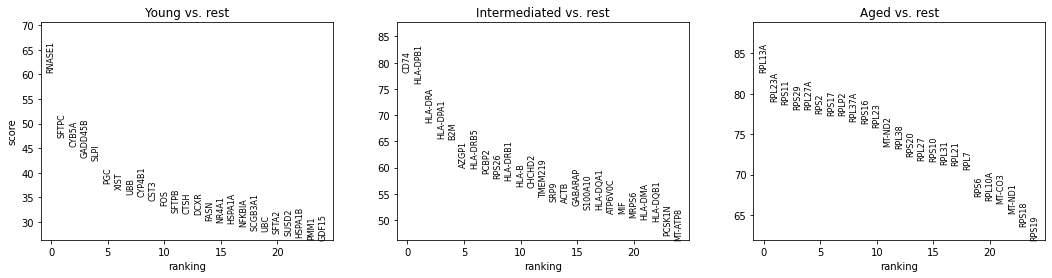

In [48]:
#find degs between age_groups
sc.tl.rank_genes_groups(adata, 'age_group', method='wilcoxon')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

In [66]:
#condition degs
sc.tl.rank_genes_groups(adata, 'age_group', groups=['Young'], 
                        reference='Aged', method='wilcoxon',key_added='Young_vs_Aged')
#sc.pl.rank_genes_groups(adata_cp, groups=['Young'], n_genes=20)

sc.tl.rank_genes_groups(adata, 'age_group', groups=['Intermediated'], 
                        reference='Aged', method='wilcoxon',key_added='Intermediated_vs_Aged')

sc.tl.rank_genes_groups(adata, 'age_group', groups=['Young'], 
                        reference='Intermediated', method='wilcoxon',key_added='Young_vs_Intermediated')

In [68]:
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
pd.DataFrame(
    {group + '_' + key[:]: result[key][group]
    for group in groups for key in ['names','pvals','pvals_adj','logfoldchanges']}).to_csv(DATA_output_stem + '/adata_rank_genes_groups.csv')

In [98]:
#degs1.add_prefix('col_')
result = adata.uns['Young_vs_Aged']
groups = result['names'].dtype.names
degs1=pd.DataFrame(
    {'Young_vs_Aged' + '_' + key[:]: result[key][group]
    for group in groups for key in ['names','pvals','pvals_adj','logfoldchanges']})

degs1.to_csv(DATA_output_stem + '/adata_rank_genes_groups_Young_vs_Aged.csv')

result = adata.uns['Intermediated_vs_Aged']
groups = result['names'].dtype.names
degs2= pd.DataFrame(
    {'Intermediated_vs_Aged' + '_' + key[:]: result[key][group]
    for group in groups for key in ['names','pvals','pvals_adj','logfoldchanges']})
degs2.to_csv(DATA_output_stem + '/adata_rank_genes_groups_Intermediated_vs_Aged.csv')

result = adata.uns['Young_vs_Intermediated']
groups = result['names'].dtype.names
degs3=pd.DataFrame(
    {'Young_vs_Intermediated' + '_' + key[:]: result[key][group]
    for group in groups for key in ['names','pvals','pvals_adj','logfoldchanges']})
degs3.to_csv(DATA_output_stem + '/adata_rank_genes_groups_Young_vs_Intermediated.csv')


In [99]:
degs1.index=degs1['Young_vs_Aged_names']
degs2.index=degs2['Intermediated_vs_Aged_names']
degs3.index=degs3['Young_vs_Intermediated_names']

degs1.index.names = ['genes']
degs2.index.names = ['genes']
degs3.index.names = ['genes']

In [101]:
degs_merge = pd.concat([degs1,degs2,degs3], axis=1)

In [104]:
degs_merge.to_csv(DATA_output_stem + '/adata_rank_genes_groups_splited_compared.csv')

In [105]:
degs_merge.head()

Young_vs_Aged_names  Young_vs_Aged_pvals  Young_vs_Aged_pvals_adj  \
NME2                   NME2                  0.0                      0.0   
RNASE1               RNASE1                  0.0                      0.0   
MT-ND4L             MT-ND4L                  0.0                      0.0   
SFTPB                 SFTPB                  0.0                      0.0   
CYB5A                 CYB5A                  0.0                      0.0   

         Young_vs_Aged_logfoldchanges Intermediated_vs_Aged_names  \
NME2                         6.305626                        NME2   
RNASE1                       3.545748                      RNASE1   
MT-ND4L                      3.257804                     MT-ND4L   
SFTPB                        3.047379                       SFTPB   
CYB5A                        2.305783                       CYB5A   

         Intermediated_vs_Aged_pvals  Intermediated_vs_Aged_pvals_adj  \
NME2                    0.000000e+00                     0.000000e+00   
RNASE1                  2.445928e-73                     7.143640e-72   
MT-ND4L                 0.000000e+00                     0.000000e+00   
SFTPB                   0.000000e+00                     0.000000e+00   
CYB5A                   0.000000e+00                     0.000000e+00   

         Intermediated_vs_Aged_logfoldchanges Young_vs_Intermediated_names  \
NME2                                 6.059377                         NME2   
RNASE1                               0.703799                       RNASE1   
MT-ND4L                              3.745605                      MT-ND4L   
SFTPB                                2.462510                        SFTPB   
CYB5A                                1.284360                        CYB5A   

         Young_vs_Intermediated_pvals  Young_vs_Intermediated_pvals_adj  \
NME2                     5.111786e-04                      2.081618e-03   
RNASE1                   0.000000e+00                      0.000000e+00   
MT-ND4L                  1.209860e-60                      3.936743e-59   
SFTPB                    9.001079e-57                      2.701903e-55   
CYB5A                   1.505740e-299                     7.189733e-297   

         Young_vs_Intermediated_logfoldchanges  
NME2                                  0.246249  
RNASE1                                2.841949  
MT-ND4L                              -0.487801  
SFTPB                                 0.584869  
CYB5A                                 1.021423

In [106]:
save_file = DATA_output_stem + '/adata_malignantcell_degs_calculated.h5ad'
adata.write_h5ad(save_file)

/home/chenh/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


# draw plot again

In [11]:
FIG_output_stem = "./output2_step2.5.3.filter_junk_scanpy_pipeline/data_Epithelial/malignant/" + 'figure' +'/'
DATA_output_stem = "./output2_step2.5.3.filter_junk_scanpy_pipeline/data_Epithelial/malignant/" + 'data' +'/'
sc.settings.figdir=FIG_output_stem  
sc.settings.set_figure_params(dpi=300, frameon=True, figsize=(3, 4), facecolor='white')

In [5]:
adata=sc.read(DATA_output_stem+ 'adata_malignantcell_degs_calculated.h5ad')

In [8]:
#define age group
cut_labels_3 = ['Young', 'Intermediated', 'Aged']
cut_bins = [20, 49, 60,100]
adata.obs['intage'] = adata.obs['age'].astype(int)
adata.obs['age_group'] = pd.cut(adata.obs['intage'], bins=cut_bins, labels=cut_labels_3)
#

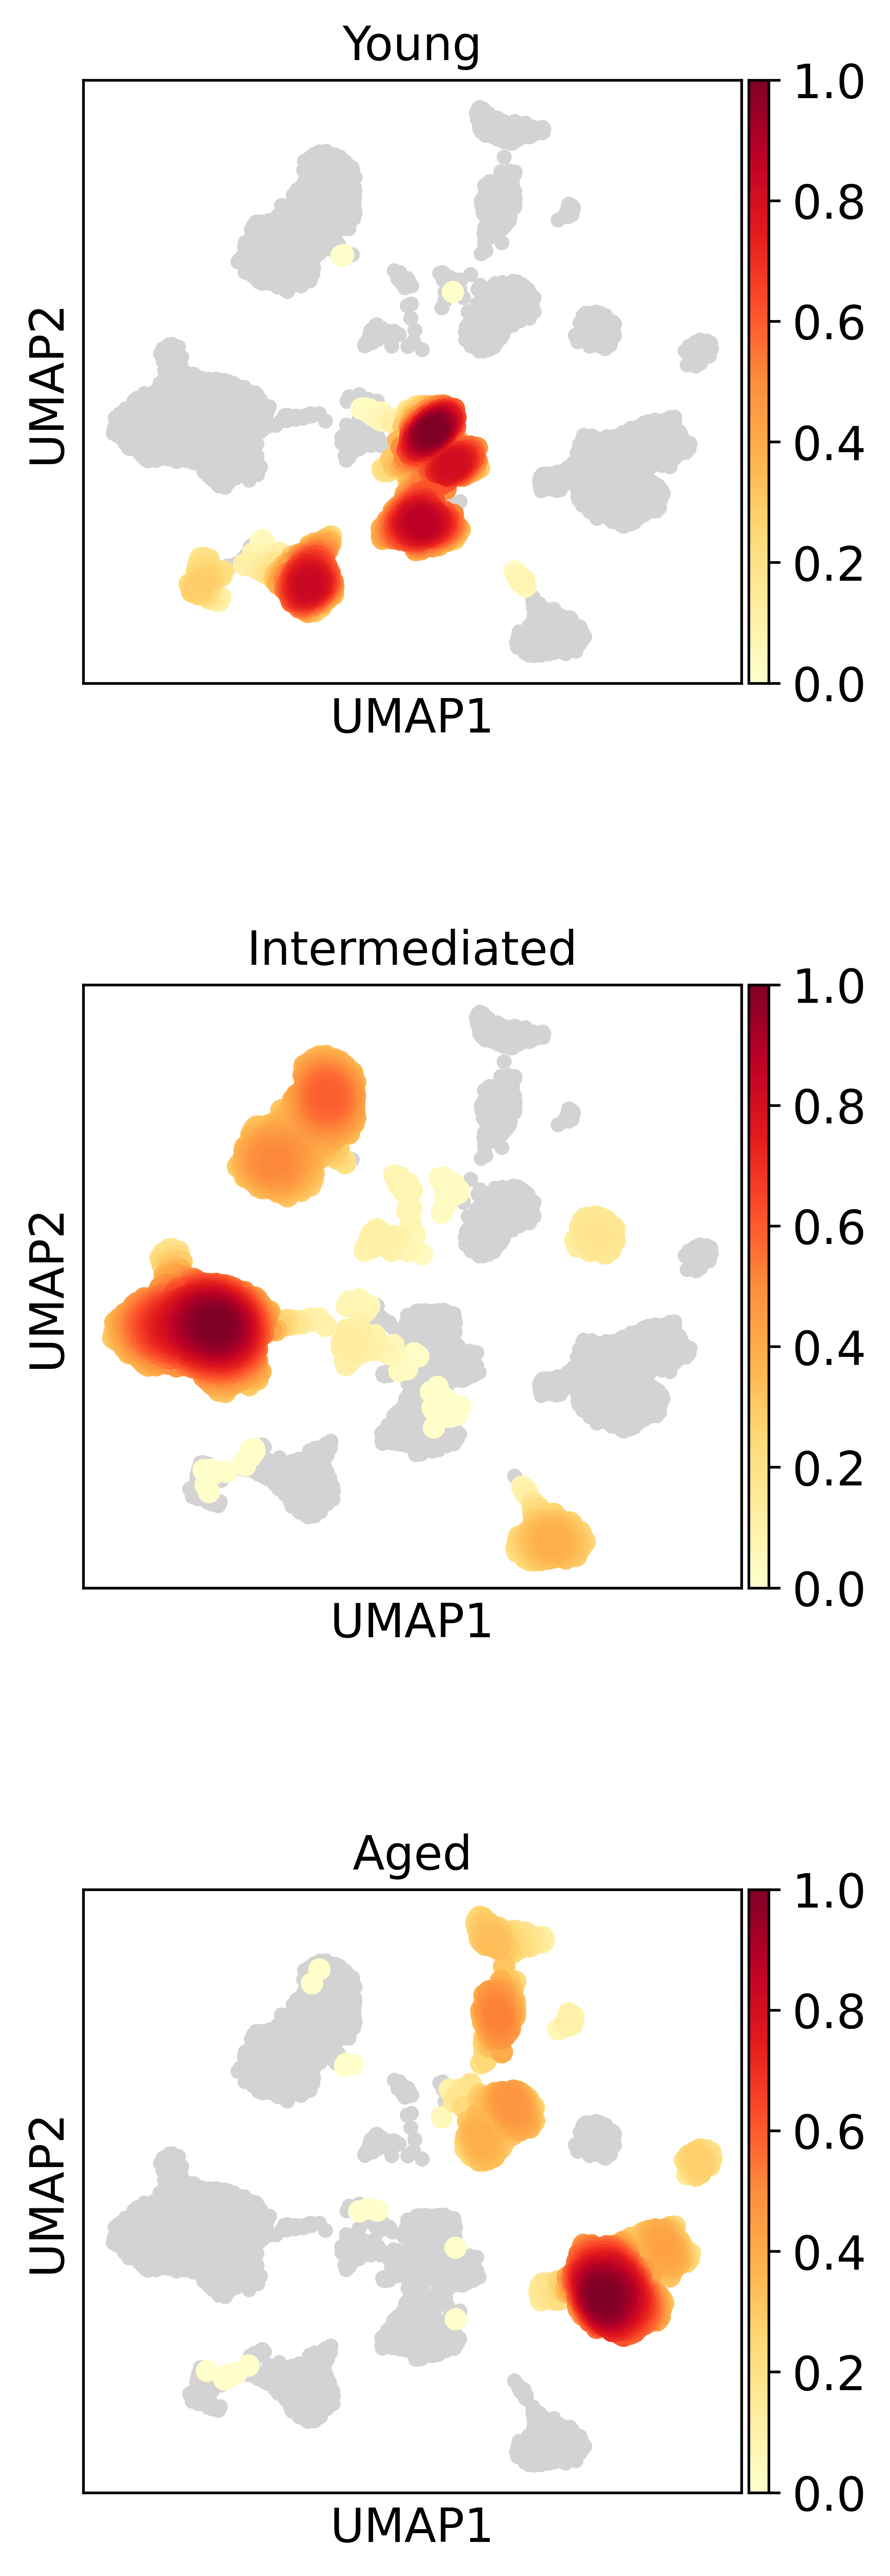

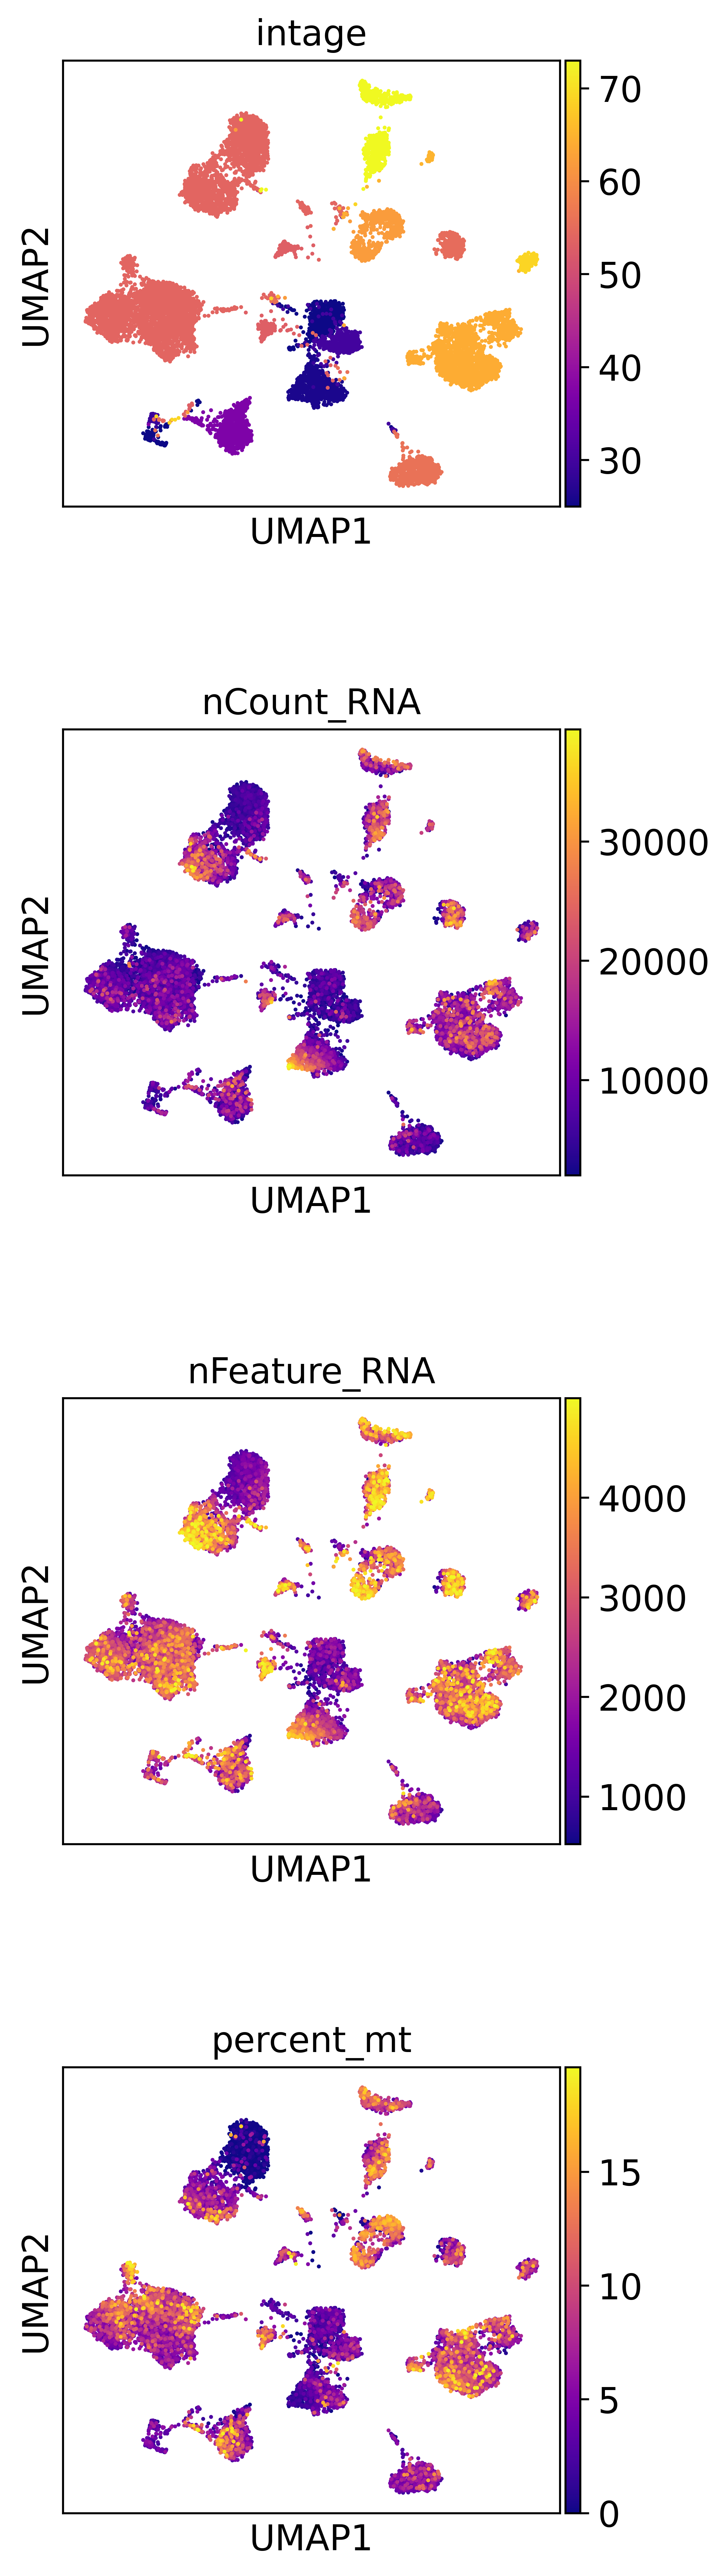

In [13]:
sc.tl.embedding_density(adata, basis='umap', groupby='age_group')

sc.pl.embedding_density(adata, basis='umap', key='umap_density_age_group', 
                        group='all',hspace=0.5,ncols=1 ,save='_age_density_EpiMal.pdf')

#sc.pl.umap(adata, color=['intage', 'nCount_RNA', 'nFeature_RNA', 'percent_mt'],color_map= 'viridis_r', hspace=0.5,ncols=1,save='_intage.qc.pdf')
sc.pl.umap(adata, color=['intage', 'nCount_RNA', 'nFeature_RNA', 'percent_mt'],
           color_map= 'plasma', hspace=0.5,ncols=1,save='_intage.qc_EpiMal.pdf')


In [ ]:
#asfaf

# diffussion map

In [19]:
sc.settings.set_figure_params(dpi=100, frameon=True, figsize=(4, 4), facecolor='white')

In [20]:
adata=sc.read(DATA_output_stem + '/adata_malignantcell_degs_calculated.h5ad')
adata

AnnData object with n_obs × n_vars = 12249 × 1547
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'Index', 'Sample', 'percent_mt', 'percent_rb', 'Cell_type', 'Cell_type_refined', 'Cell_subtype', 'age', 'Sex', 'Smoking', 'Stages', 'percent_mt_merge', 'percent_rb_merge', 'S_Score', 'G2M_Score', 'Phase', 'old_ident', 'CC_Difference', 'Cell_subtype_unimodel', 'Cell_type_unimodel', 'UMAP_Clusters_harmony_overclustered', 'scrubletScore_default', 'scrublet_predict_default', 'scrubletScore_n30', 'scrublet_predict_n30', 'louvain', 'intage', 'age_group'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Intermediated_vs_Aged', 'Sample_colors', 'Young_vs_Aged', 'Young_vs_Intermediated', 'hvg', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connect

In [162]:
aadata=sc.AnnData(X=adata.raw.X, obs=adata.obs, var=adata.raw.var)
#has been logged

In [163]:
aadata.raw = aadata

sc.pp.highly_variable_genes(aadata,  flavor='cell_ranger', n_top_genes=4000,subset=True)

sc.pp.regress_out(aadata, ['nCount_RNA', 'percent_mt_merge','CC_Difference'])
sc.pp.scale(aadata, max_value=10)
sc.tl.pca(aadata, svd_solver='arpack')

sce.pp.harmony_integrate(aadata, 'Sample')
sc.pp.neighbors(aadata, n_neighbors=5, n_pcs=7,use_rep='X_pca_harmony')

#sc.pp.neighbors(aadata)
#sc.tl.umap(aadata)
#sc.tl.louvain(aadata,  resolution=1)
#sc.pl.umap(aadata, color=['Sample'],palette=color_CLASS)
sc.tl.diffmap(aadata)

/home/chenh/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/chenh/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
2021-04-16 22:34:04,481 - harmonypy - INFO - Iteration 1 of 10
2021-04-16 22:34:09,084 - harmonypy - INFO - Iteration 2 of 10
2021-04-16 22:34:13,688 - harmonypy - INFO - Converged after 2 iterations


In [164]:
aadata

AnnData object with n_obs × n_vars = 12249 × 3999
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'Index', 'Sample', 'percent_mt', 'percent_rb', 'Cell_type', 'Cell_type_refined', 'Cell_subtype', 'age', 'Sex', 'Smoking', 'Stages', 'percent_mt_merge', 'percent_rb_merge', 'S_Score', 'G2M_Score', 'Phase', 'old_ident', 'CC_Difference', 'Cell_subtype_unimodel', 'Cell_type_unimodel', 'UMAP_Clusters_harmony_overclustered', 'scrubletScore_default', 'scrublet_predict_default', 'scrubletScore_n30', 'scrublet_predict_n30', 'louvain', 'intage', 'age_group'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'neighbors', 'diffmap_evals'
    obsm: 'X_pca', 'X_pca_harmony', 'X_diffmap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

/home/chenh/miniconda3/lib/python3.7/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])


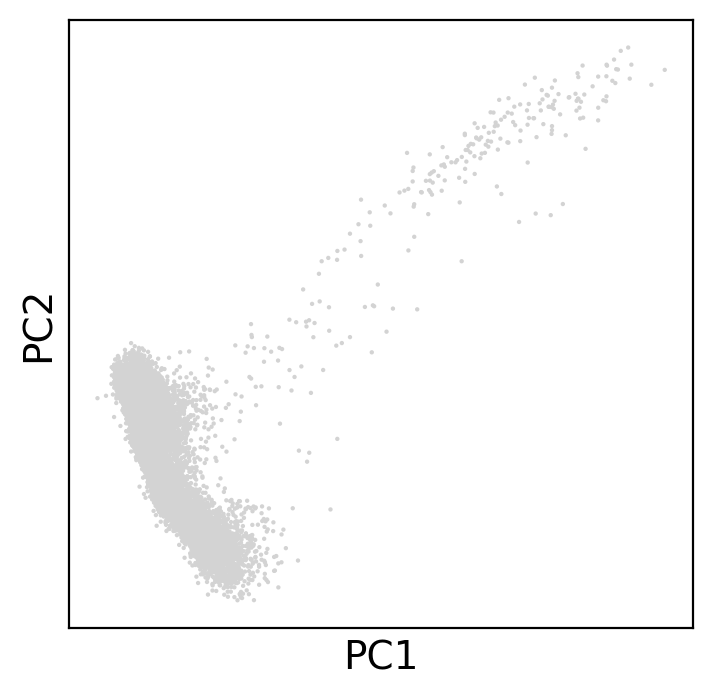

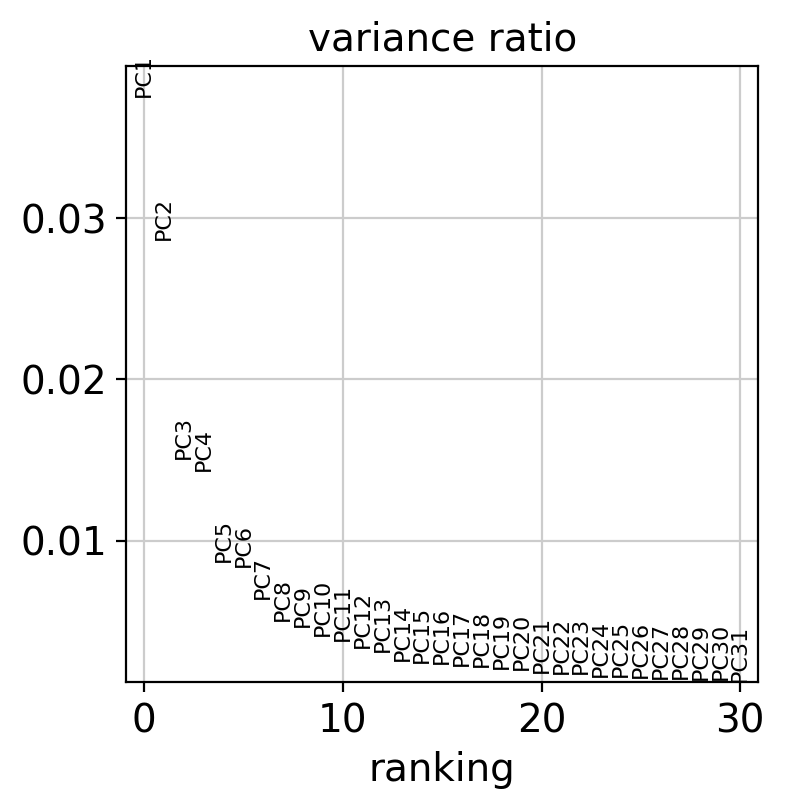

In [165]:
sc.pl.pca(aadata)
sc.pl.pca_variance_ratio(aadata)

In [166]:
aadata.obsm['X_pca'] = aadata.obsm['X_pca'][:,0:6]

In [167]:
#sc.pp.neighbors(aadata)
sc.tl.diffmap(aadata)

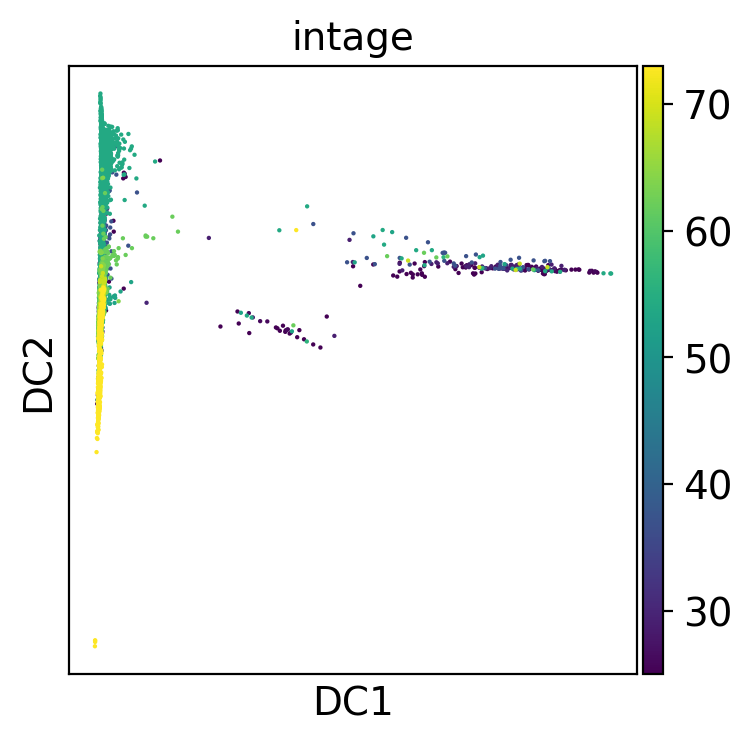

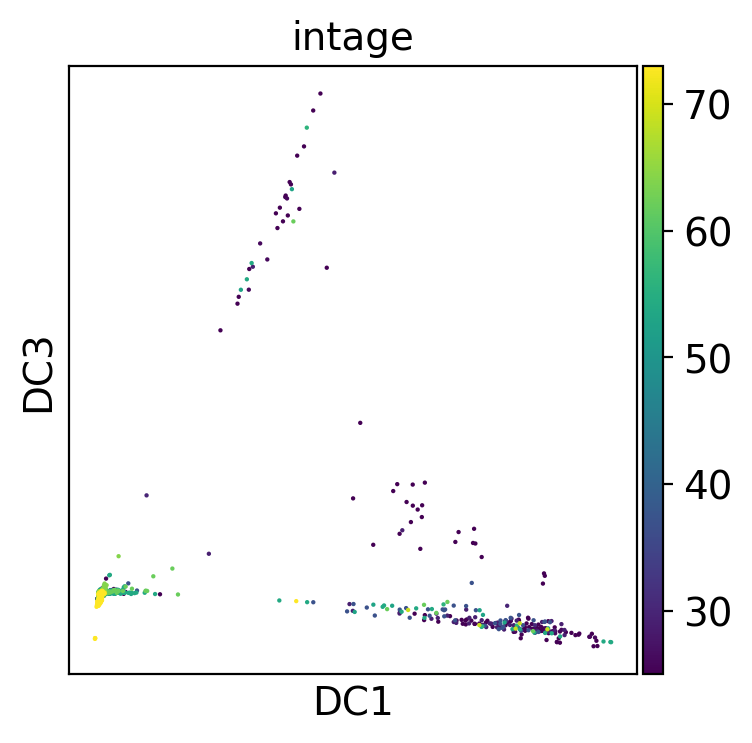

In [168]:
sc.pl.diffmap(aadata, components='1,2', color='intage')
sc.pl.diffmap(aadata, components='1,3', color='intage')

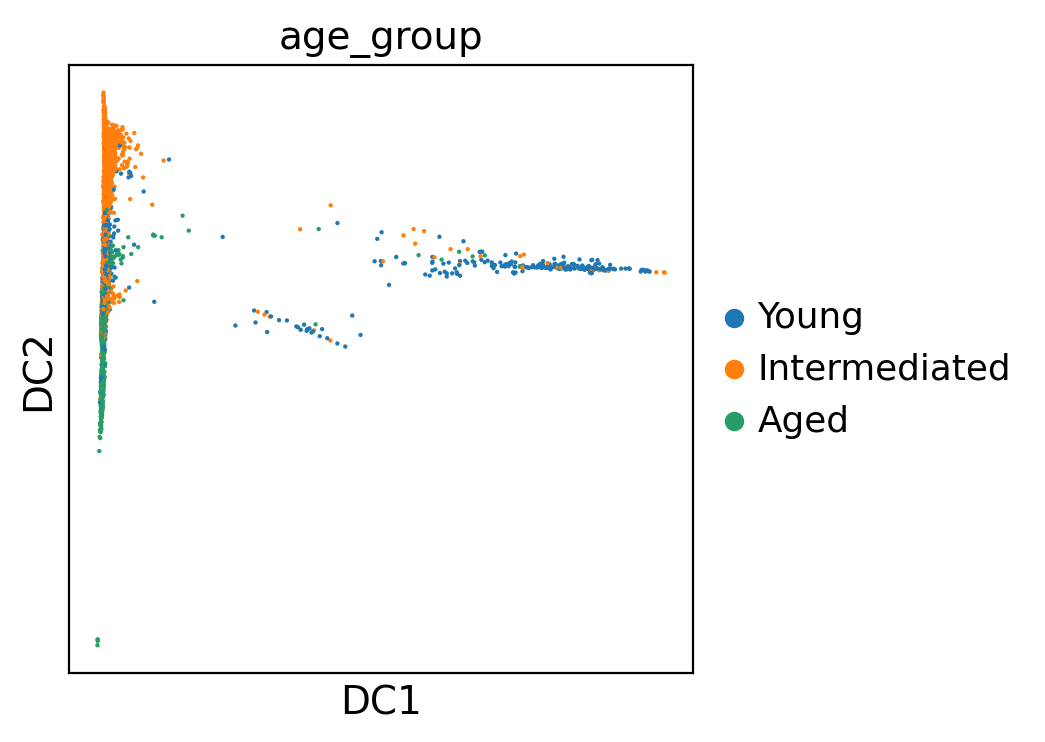

In [169]:
sc.pl.diffmap(aadata, components='1,2', color='age_group')

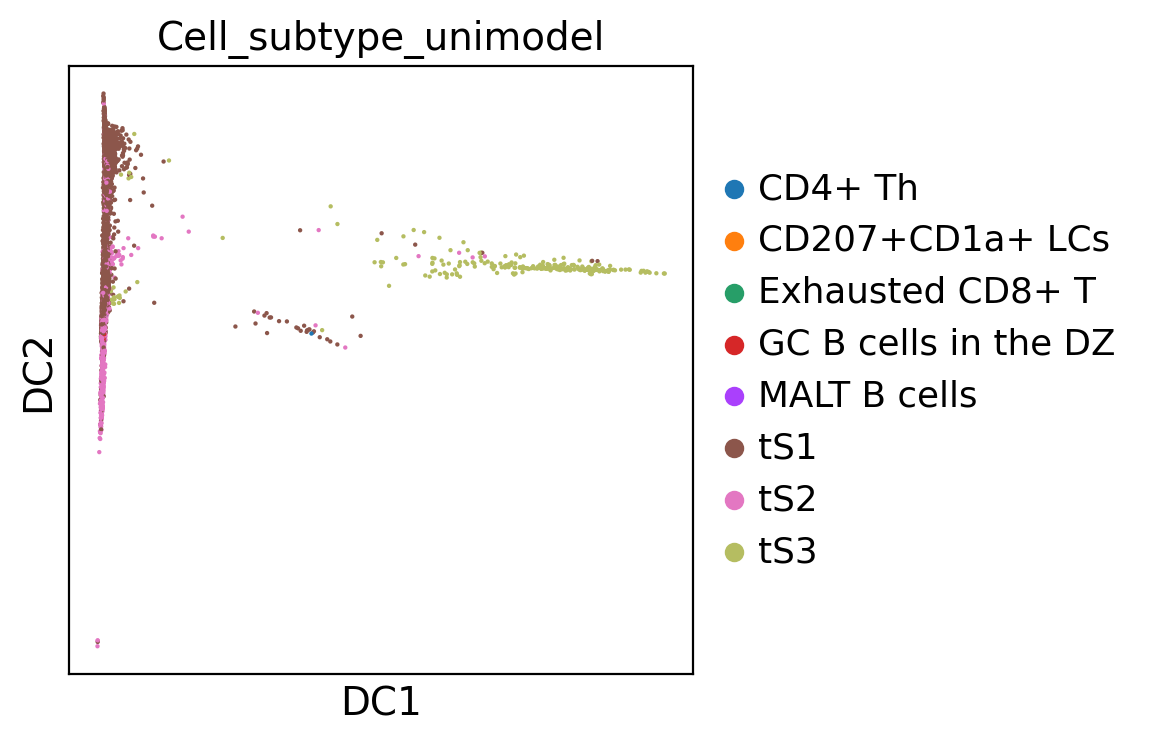

In [170]:
sc.pl.diffmap(aadata, components='1,2', color='Cell_subtype_unimodel')

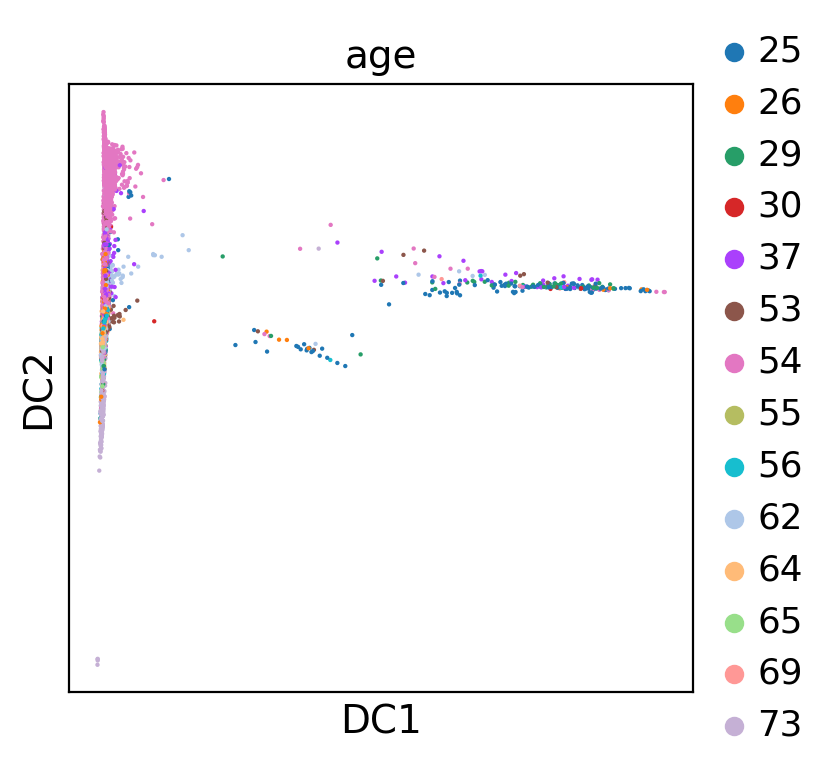

In [171]:
sc.pl.diffmap(aadata, components='1,2', color='age')

In [172]:
#Find the stem cell with the highest DC3 value to act as root for the diffusion pseudotime and compute DPT
stem_mask = np.isin(aadata.obs['age_group'], 'Young')
max_stem_id = np.argmin(aadata.obsm['X_diffmap'][stem_mask,1])
root_id = np.arange(len(stem_mask))[stem_mask][max_stem_id]
aadata.uns['iroot'] = root_id

#Compute dpt
sc.tl.dpt(aadata)

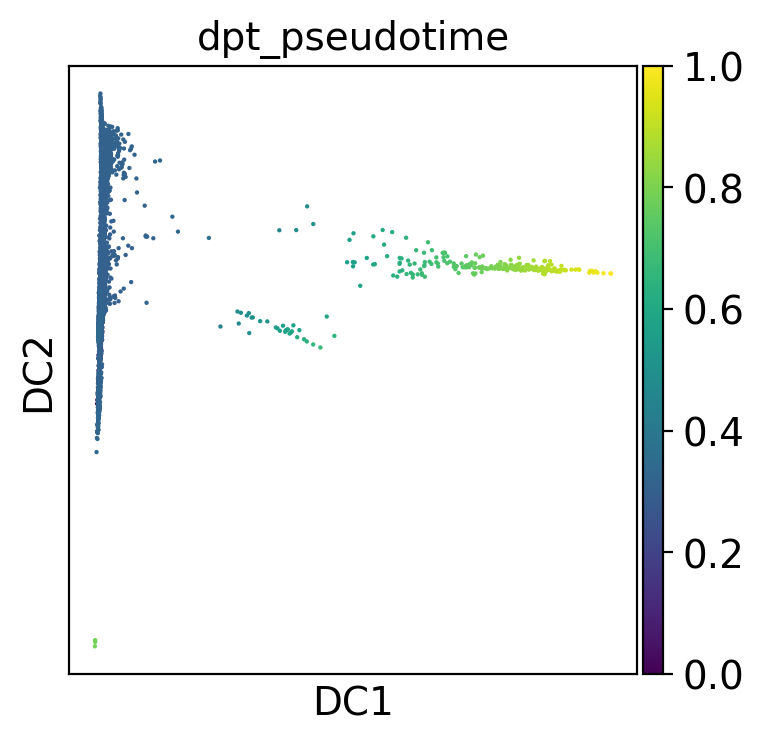

In [173]:
#Visualize pseudotime over differentiation
sc.pl.diffmap(aadata, components='1,2', color='dpt_pseudotime')

# scv

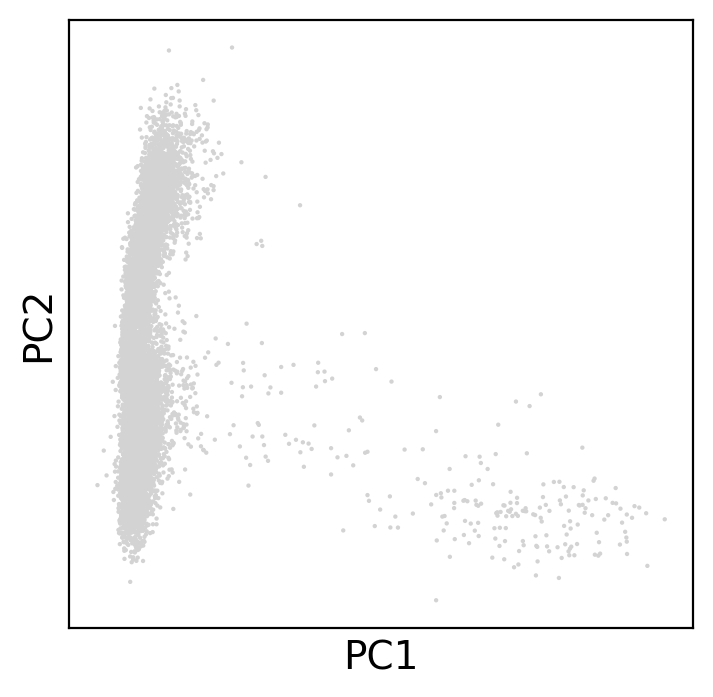

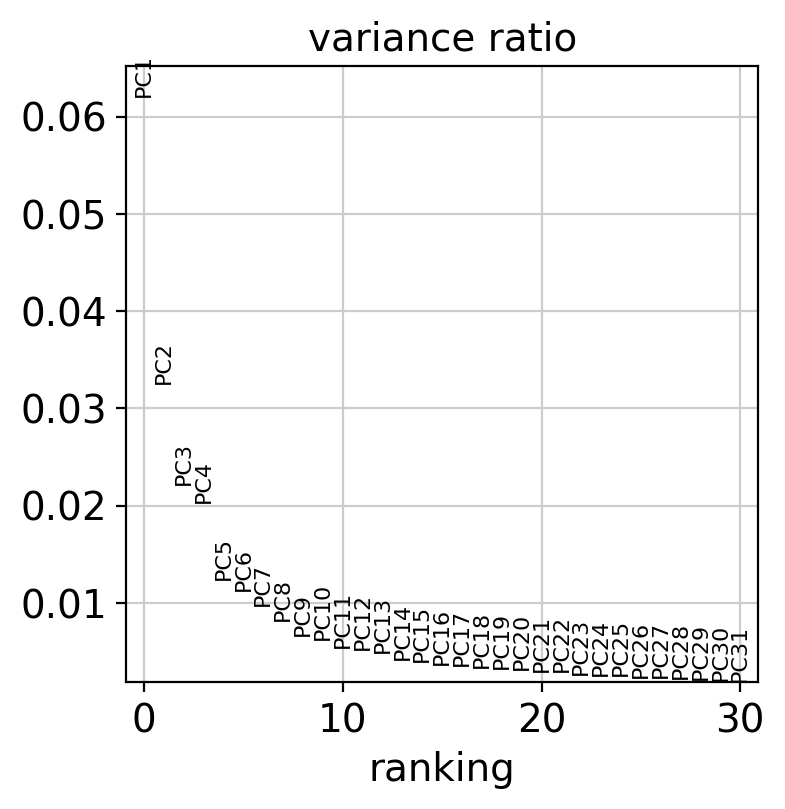

In [21]:
sc.pl.pca(adata)
sc.pl.pca_variance_ratio(adata)

In [22]:
adata

AnnData object with n_obs × n_vars = 12249 × 1547
    obs: 'orig_ident', 'nCount_RNA', 'nFeature_RNA', 'Index', 'Sample', 'percent_mt', 'percent_rb', 'Cell_type', 'Cell_type_refined', 'Cell_subtype', 'age', 'Sex', 'Smoking', 'Stages', 'percent_mt_merge', 'percent_rb_merge', 'S_Score', 'G2M_Score', 'Phase', 'old_ident', 'CC_Difference', 'Cell_subtype_unimodel', 'Cell_type_unimodel', 'UMAP_Clusters_harmony_overclustered', 'scrubletScore_default', 'scrublet_predict_default', 'scrubletScore_n30', 'scrublet_predict_n30', 'louvain', 'intage', 'age_group'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'Intermediated_vs_Aged', 'Sample_colors', 'Young_vs_Aged', 'Young_vs_Intermediated', 'hvg', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connect

In [23]:
adata.obsm['X_pca'] = adata.obsm['X_pca'][:,0:8]
sc.pp.neighbors(adata)
sc.tl.diffmap(adata)


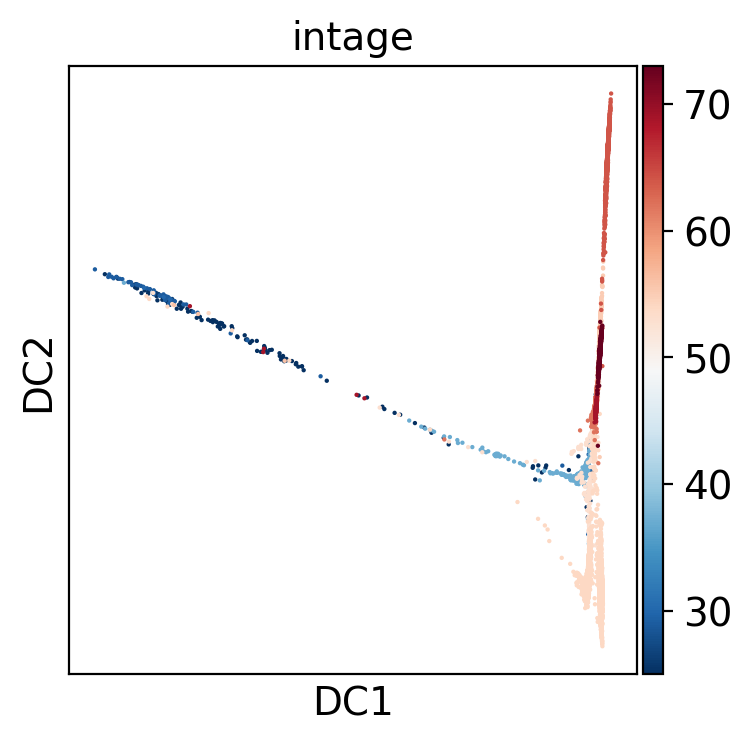

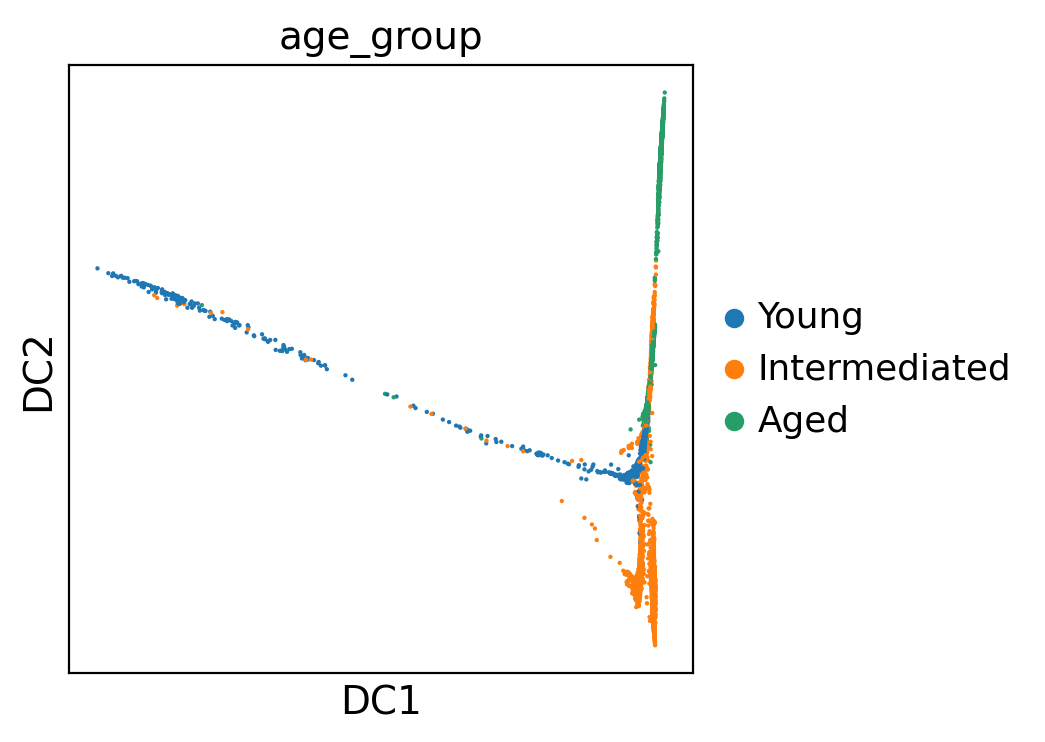

In [28]:
sc.pl.diffmap(adata, components='1,2', color='intage', save='_malignant_age.pdf')

sc.pl.diffmap(adata, components='1,2', color='age_group',save='_malignant_age_group.pdf')
#sc.pl.diffmap(adata, components='1,3', color='intage')

In [29]:
#Find the stem cell with the highest DC3 value to act as root for the diffusion pseudotime and compute DPT
stem_mask = np.isin(adata.obs['age_group'], 'Young')
max_stem_id = np.argmin(adata.obsm['X_diffmap'][stem_mask,1])
root_id = np.arange(len(stem_mask))[stem_mask][max_stem_id]
adata.uns['iroot'] = root_id

#Compute dpt
sc.tl.dpt(adata)

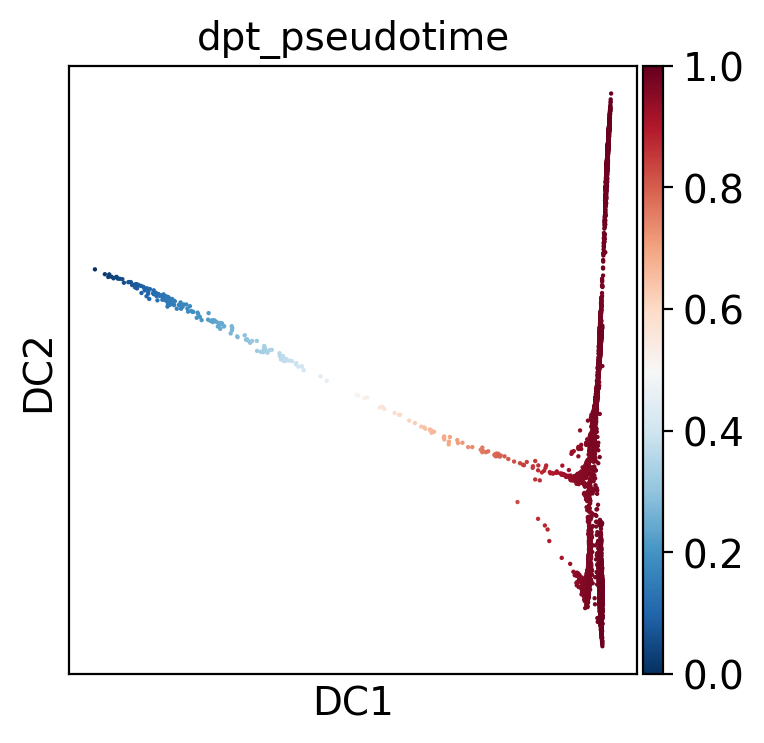

In [31]:
#Visualize pseudotime over differentiation
sc.pl.diffmap(adata, components='1,2', color='dpt_pseudotime',save='_pseudotime.pdf')